# Solve the equation with odeint

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


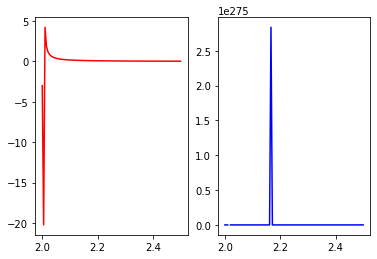

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def f(y,x):
    dydx = 7*(y**2)*(x**3)
    return dydx
y_initial = 3

x = np.linspace(2,2.5,100)

app_sol = odeint(f,y_initial,x)
exact_sol = 1/(((7/4)*(x**4)) - (85/3))

plt.subplot(1,2,1)
#plt.plot(x,app_sol, "b")
plt.plot(x,exact_sol, "r")

plt.subplot(1,2,2)
plt.plot(x,app_sol, "b")
# plt.plot(x, abs(app_sol - exact_sol))
plt.show()

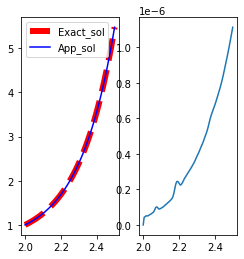

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def f(x,t):
    dxdt = 5*x -3
    return dxdt
x_initial = 1

t = np.linspace(2,2.5,100)

app_sol = odeint(f,x_initial,t)
y=app_sol.flatten()
exact_sol = (2/5)*(np.exp(5*(t-2))) + (3/5)

plt.subplot(1,3,1)
plt.plot(t,exact_sol, "r--", linewidth = 6)
plt.plot(t,app_sol, "b")
plt.plot()
plt.legend(['Exact_sol','App_sol'])

plt.subplot(1,3,2)
plt.plot(x, abs(y - exact_sol))
plt.show()

# Solve ODE's with Euler's method

1. Explicit Euler Method

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def f(x,t):
    dxdt = 5*x-3
    return dxdt

x[0] = 1
t=np.linspace(2,2.5,100)
h = (2.5-2)/(100-1)
for i in range(0,(len(t)-1)):
    x[i+1] = x[i] + h*f(t[i],x[i]) 
x
exact_sol = (2/5)*(np.exp(5*(t-2))) + (3/5)
plt.subplot(1,3,1)
plt.plot(t,x,'g')
plt.plot(t,exact_sol,'r')
plt.xlabel('Time')
plt.ylabel('Euler solution')
plt.subplot(1,3,2)
plt.plot(t,(abs(exact_sol-x)),'r')
# plt.legend(['Exact solution'])
# plt.show()

2. Combined modified and explicit method

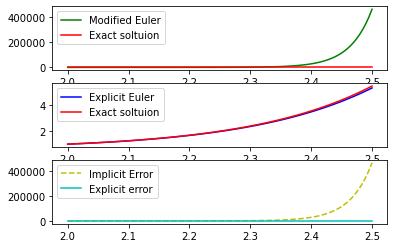

In [3]:
# import numpy as np
# from matplotlib import pyplot as plt
from pylab import*

def f1(x1,t):
    dx1dt = 5*x1-3
    return dx1dt

t=np.linspace(2,2.5,100)
x1=np.zeros([len(t),1])
x1[0] =1
h = (2.5-2)/(100-1)
for i in range(0,(len(t)-1)):
    x1[i+1] = x1[i] + h*f1((x1[i] + f1(x1[i],t[i])),t[i+1])
x1

#################################################

def f2(x,t):
    dxdt = 5*x-3
    return dxdt

t=np.linspace(2,2.5,100)
x=np.zeros([len(t),1])
x[0] = 1
h = (2.5-2)/(100-1)
for i in range(0,(len(t)-1)):
    x[i+1] = x[i] + h*f2(x[i],t[i]) 
x
x2=x1.flatten()  
x3=x.flatten()
exact_sol = (2/5)*(np.exp(5*(t-2))) + (3/5)
plt.subplot(3,1,1)
plt.plot(t,x1,'g')              # implicit euler
plt.plot(t,exact_sol,'r')
plt.legend(['Modified Euler', 'Exact soltuion'])

plt.subplot(3,1,2)
plt.plot(t,x,'b')              # implicit euler
plt.plot(t,exact_sol,'r')
plt.legend(['Explicit Euler', 'Exact soltuion'])

plt.subplot(3,1,3)
plt.plot(t,(abs(exact_sol-x2)),'y--')
plt.plot(t, (abs(exact_sol - x3)), 'c')
plt.legend(['Implicit Error','Explicit error'])

plt.plot.grid=True
# plt.show()

# Runge Kutta 4th Order

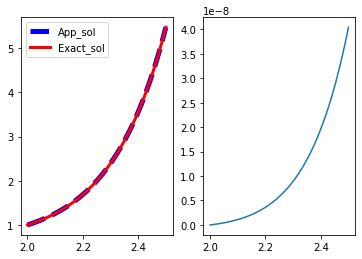

In [13]:
from pylab import*
def f3(x,t):
    dxdt = 5*x-3
    return dxdt

def RK4(f3,x0,t):
    h=t[1] - t[0]
    x=np.zeros([len(t),len(x0)])
    x[0] = x0
    for i in range(len(t)-1):
        k1 = f3(x[i],t[i])
        k2 = f3(x[i]+h*(k1/2), t[i]+(h/2))
        k3 = f3(x[i]+h*(k2/2), t[i]+(h/2))
        k4 = f3(x[i]+h*k3, t[i]+h)
        x[i+1] = x[i] + (h/6)*(k1+2*k2+2*k3+k4)
        
        
    return x
x0 = [1]
t = np.linspace(2,2.5,100)
exact_sol = (2/5)*(np.exp(5*(t-2))) + (3/5)
y=RK4(f3,x0,t)
y1 = y[:,0]
y1

plt.subplot(1,2,1)
plt.plot(t,y1,'b--',linewidth = 5)
plt.plot(t,exact_sol,'r', linewidth = 3)
plt.legend(['App_sol','Exact_sol'])

plt.subplot(1,2,2)
plt.plot(t,abs(y1-exact_sol))
plt.show()

# Dealing with a system of ODE

1. Explicit Euler

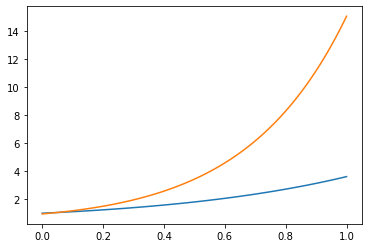

In [12]:
from pylab import*

def f4(s,t):
    [x,y]=s
    dxdt = x+6*y
    dydt = x
    return np.array([dxdt,dydt])

s0=np.array([2,1])

t=np.linspace(0,1,100)

h = (2.5-2)/(100-1)
s=np.zeros([len(t),len(s0)])
s[0]=s0
for i in range(len(t)-1):
    s[i+1] = s[i] + h*f4(s[i],t[i])
y = s[:,1]
    
y_exact = (3/4)*np.exp(3*t) +(1/5)*np.exp(-2*t)

plt.subplot(1,1,1)
plt.plot(t,y)
plt.plot(t,y_exact)
plt.show()


2. Implicit Euler

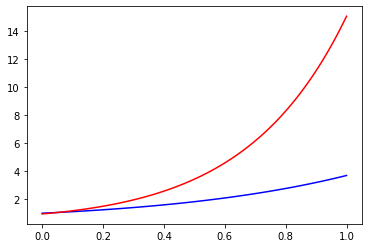

In [37]:
from pylab import*

def f4(m,t):
    [w,z]=m
    dwdt = w+6*z
    dzdt = w
    return np.array([dwdt,dzdt])

s0=np.array([2,1])

t=np.linspace(0,1,100)

h = (2.5-2)/(100-1)
m=np.zeros([len(t),len(s0)])
m[0]=s0
for i in range(len(t)-1):
    m[i+1] = m[i] + h*f4((m[i]+h*f4(m[i],t[i])),t[i+1])
z = m[:,1]
    
y_exact = (3/4)*np.exp(3*t) +(1/5)*np.exp(-2*t)

plt.subplot(1,1,1)
plt.plot(t,y,'b')
plt.plot(t,y_exact,'r')
plt.show()


3. $4^{th}$ order Runge-Kutta


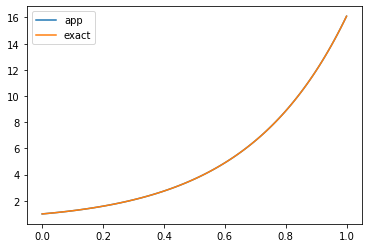

In [4]:
from pylab import*
from scipy.integrate import odeint
def f4(s,t):
    [x,y]=s
    dxdt = x+6*y
    dydt = x
    return np.array([dxdt,dydt])
x0=np.array([2,1])
t=np.linspace(0,1,100)
S=odeint(f4,x0,t)
yy=S[:,1]

y_exact = (4/5)*np.exp(3*t) +(1/5)*np.exp(-2*t)

plt.subplot(1,1,1)
plt.plot(t,yy)
plt.plot(t,y_exact)
plt.legend(['app','exact'])
plt.show()

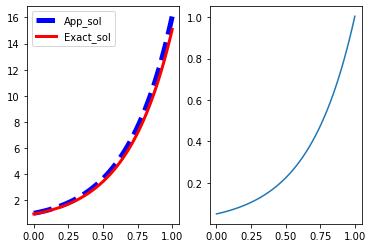

In [1]:
from pylab import*

def f4(s,t):
    [x,y]=s
    dxdt = x+6*y
    dydt = x
    #dzdt = z+x
    return np.array([dxdt,dydt])

def RK4(f,x0,t):
    h=t[1] - t[0]
    s=np.zeros([len(t),len(x0)])
    s[0] = x0
    for i in range(len(t)-1):
        k1 = f(s[i],t[i])
        k2 = f(s[i]+h*(k1/2), t[i]+(h/2))
        k3 = f(s[i]+h*(k2/2), t[i]+(h/2))
        k4 = f(s[i]+h*k3, t[i]+h)
        s[i+1] = s[i] + (h/6)*(k1+2*k2+2*k3+k4)
    return s
x0 = [2,1]
t = np.linspace(0,1,100)
exact_sol = (3/4)*np.exp(3*t) + (1/5)*np.exp(-2*t)
yy=RK4(f4,x0,t)
y = yy[:,1]
y

plt.subplot(1,2,1)
plt.plot(t,y,'b--',linewidth = 5)
plt.plot(t,exact_sol,'r', linewidth = 3)
plt.legend(['App_sol','Exact_sol'])

plt.subplot(1,2,2)
plt.plot(t,abs(y-exact_sol))
plt.show()